## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
rows = df.shape[0]
print('# of rows : ' , rows)

# of rows :  294478


c. The number of unique users in the dataset.

In [4]:
unique = df['user_id'].nunique()
print ("# of unique users: " , unique)

# of unique users:  290584


d. The proportion of users converted.

In [5]:
converted = (df['converted'] == 1)
proportionconverted = converted.sum() / unique
print ("proportion of users converted : " , proportionconverted)

proportion of users converted :  0.121262698566


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
dont_match = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print ("The number of times the new_page and treatment don't match : " , dont_match)

The number of times the new_page and treatment don't match :  3893


f. Do any of the rows have missing values?

In [7]:
print ("Missing Values: " , df.isnull().sum().sum())


Missing Values:  0


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
dont_match = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
df2 = df.drop(dont_match.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print ("Number of unique users : " , df2['user_id'].nunique())

Number of unique users :  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.loc[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(keep='first' , inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print ("probability of an individual converting: " , df2.converted.mean())

probability of an individual converting:  0.119596675671


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_group = df2['group'] == 'control'
control_group_mean = df2[control_group].converted.mean()
print ("probability of an individual converted: " , control_group_mean)

probability of an individual converted:  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_group = df2['group'] == 'treatment'
treatment_group_mean = df2[treatment_group].converted.mean()
print ("probability of an individual converted: " , treatment_group_mean)

probability of an individual converted:  0.118807247903


d. What is the probability that an individual received the new page?

In [17]:
p2 = (df2.landing_page) == 'new_page'
print("probability that an individual received the new page : " , p2.mean())

probability that an individual received the new page :  0.500063664676


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer & Explanation**
<font color='blue'>
Considering the total converstion rate (proportion of users converted :  0.121262698566), the control group has probability of an individual converted:  0.1203863045 and probability of an individual converted in the treatment group:  0.118807247903, these figures show a very small percentages of coversion and give no solid evidence that new page is worth according to the test made above, therefore, more analysis should be made to data so we may come up with a better descision. </font>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null & Alternative Hypotheses**<font color='blue'>
<p>Under the null **H0 : 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0** , default situation is a better choice.
<p>Under the alt  **H1 : 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 <= 0** , new page situation is a better choice.</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# under the null value according to step#2 above given 'that  𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 are equal.'
P_new = P_old = (df2.converted)
P_new_mean = P_new.mean()
print ( " conversion rate for 𝑝𝑛𝑒𝑤 under the null : " , P_new_mean)

 conversion rate for 𝑝𝑛𝑒𝑤 under the null :  0.119596675671


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
P_old_mean = P_old.mean()
print (" conversion rate for 𝑝𝑜𝑙𝑑 under the null : " , P_old_mean)

 conversion rate for 𝑝𝑜𝑙𝑑 under the null :  0.119596675671


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
N_new = (df2.group == 'treatment').sum()
print ("  number of individuals in the treatment group : " , N_new)

  number of individuals in the treatment group :  145311


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
N_old = (df2.group == 'control').sum()
print ("number of individuals in the control group : " , N_old)

number of individuals in the control group :  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
P_new_mean

0.11959667567149027

In [23]:
new_page_converted = np.random.binomial(N_new , P_new_mean)
print (" Converted to new page simulated: " , new_page_converted)

 Converted to new page simulated:  17524


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(N_old ,P_old_mean)
print ("Converted to old page simulated: " , old_page_converted)

Converted to old page simulated:  17357


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
P_new_old = (new_page_converted / N_new) - (old_page_converted / N_old)
print ("𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 : " , P_new_old)

𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 :  0.00111883701828


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(2, P_new_mean, N_new)
    old_page_converted = np.random.binomial(2 ,P_old_mean, N_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

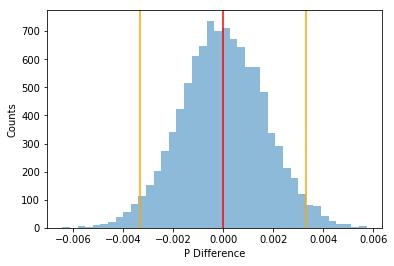

In [27]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs , bins=40 , alpha=0.5)
plt.xlabel('P Difference')
plt.ylabel('Counts')
plt.axvline(x=np.percentile(p_diffs, 2.5),  color='orange');
plt.axvline(x=np.percentile(p_diffs, 97.5),  color='orange');
plt.axvline(x=p_diffs.mean(),  color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_diffs_propertion = (p_diffs > (treatment_group_mean - control_group_mean)).mean()
print ("proportion of the p_diffs : " , p_diffs_propertion)

proportion of the p_diffs :  0.8272


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer & Explanation**<font color='blue'>
The computed value in part (J) is called in scientific studies **P-Value** having this value closer to  **(1)** 
indicated that we failed to reject the **H0** hyptheses. So the new page is not making a big difference.</font> 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm
convert_old = (df2[df2.landing_page == 'old_page'].converted == 1)
convert_new = (df2[df2.landing_page == 'new_page'].converted == 1)
n_old = (df2.landing_page == 'old_page')
n_new = (df2.landing_page == 'new_page')

In [46]:
print(" Converted to Old: " , convert_old.sum() , "\n Converted to New: " , convert_new.sum())

 Converted to Old:  17489 
 Converted to New:  17264


In [47]:
print("# of Old pages: " , n_old.sum() , "\n# of New Pages: " ,  n_new.sum())

# of Old pages:  145274 
# of New Pages:  145311


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [48]:
from statsmodels.stats.proportion import proportions_ztest
count = [convert_new.sum(), convert_old.sum()]
nobs = [n_new.sum(), n_old.sum()]
z_score, p_value = sm.stats.proportions_ztest(count, nobs , alternative='larger')

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [49]:
print ("Z Score is: " , z_score , "\nPval is   : ", p_value)

Z Score is:  -1.31160753391 
Pval is   :  0.905173705141


In [50]:
from scipy.stats import norm
print(norm.cdf(z_score))
print(norm.ppf(1-(0.05)))

0.0948262948594
1.64485362695


**Answer & Explanation**
<font color='blue'>
According the findings above, **Z-Score** -1.31160753391 is less than the critical value at 95% confidence 1.64485362695 and **P Value** 0.905173705141 is still in the high range closer to **(1)** , this indicated failure to reject the null hypotheses **H0** <font color='green'>this agrees with part  J & K </font>above. </font>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer & Explanation**
<font color='blue'>
Since there is two states (converstion , no converstion), the best model to be used is : **Logistic Regression**</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df2c = df2.copy()
df2c['intercept'] = 1
df2c['ab_page'] = 0
Condition1 = (df2c['group'] == 'treatment') 
df2c.loc[Condition1, 'ab_page']= 1
df2c[df2c.ab_page == 1].head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1


In [52]:
df2c[df2c.ab_page == 0].head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [53]:
Lg = sm.Logit(df2c['converted'] , df2c[['intercept' , 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
Lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Apr 2019   Pseudo R-squ.:               8.085e-06
Time:                        19:46:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer & Explanation**
<font color='blue'>
**P - Value** of ab_page is: 0.190. 
It differes from P - Value in part || as that part || is considering a one state assumption under the null value which is ("Old page is better" unless the null hypotheses is rejected).   

**H0 : 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 >= 0** , default situation is a better choice. Under the alt **H1 : 𝑝𝑜𝑙𝑑 - 𝑝𝑛𝑒𝑤 <= 0** , new page situation is a better choice.

<p><p>In this part |||, the P - Value is tested on two-sided states (conversion, no converstion), 

**H0 : 𝑝𝑛𝑒𝑤 != 𝑝𝑜𝑙𝑑 (Converted)** , Under the alt **H1 : 𝑝𝑛𝑒𝑤 = 𝑝𝑜𝑙𝑑 (Not Converted)**. 
</font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer & Explanation**
<font color='blue'>
It is a good idea to include other facotors on regression model the advantage of that it clears some uncertinity from the outcome like testing a value according to time, country, etc.</font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
countries = pd.read_csv('countries.csv')
joined = df2c.set_index('user_id').join(countries.set_index('user_id'))
joined[joined['country'].unique()] = pd.get_dummies(joined['country'])
joined.head(2)

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
converted_joined = joined['converted']
intercept_joined = joined[['intercept' , 'ab_page' , 'US' , 'UK']]
Lg2 = sm.Logit(converted_joined , intercept_joined).fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [57]:
Lg3 = sm.Logit(converted_joined , joined[['intercept' , 'ab_page' , 'CA']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [58]:
Lg2.summary() , Lg3.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:              converted   No. Observations:               290585
 Model:                          Logit   Df Residuals:                   290581
 Method:                           MLE   Df Model:                            3
 Date:                Sun, 07 Apr 2019   Pseudo R-squ.:               2.324e-05
 Time:                        19:46:31   Log-Likelihood:            -1.0639e+05
 converged:                       True   LL-Null:                   -1.0639e+05
                                         LLR p-value:                    0.1758
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
 ab_page       -0.0150      0.011     -1.308      0.191      -0.037   

In [59]:
ab_page_exp = 1/np.exp(-0.0150)
US_exp = 1/np.exp(-0.0408) # for interpertation we exponenitiate.
UK_exp = 1/np.exp(0.0099)
CA_exp = 1/np.exp(-0.0016)
print('US is : ' , US_exp)
print('UK is : ' , UK_exp)
print('CA is : ' , CA_exp)

US is :  1.04164375596
UK is :  0.990148843683
CA is :  1.00160128068


**Answer & Explanation**
<font color='blue'>
According to the values above since they are higher than 5%, country tend to be for no significant effect to conversion. <p>**Conclusion** 
Performing all above analysis in part | , || , ||| , the new page is not showing a difference from the old page, so in conclude that null hypotheses is true and failed to reject. **Pold >= Pnew** </font>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0